# COMP 472 – Mini Project 1
## Handwritten Digit Classifier using Logistic Regression
This notebook solves the AI mini project step-by-step using scikit-learn's built-in digits dataset.

**Goal:** Build a machine learning model that can recognize handwritten digits (0–9) using Logistic Regression.

**Libraries Used:**
- NumPy (for data manipulation)
- Matplotlib (for visualizing images)
- scikit-learn (for dataset, model, and evaluation tools)

In [9]:
import numpy as np                          # for handling numbers (like big grids of pixel values)
import matplotlib.pyplot as plt             # for showing the images
from sklearn.datasets import load_digits    # to load the dataset of digit images
from sklearn.linear_model import LogisticRegression  # the model that learns to classify digits
from sklearn.model_selection import train_test_split # to divide data into training/testing parts
from sklearn.metrics import classification_report, confusion_matrix  # to evaluate the model

## Step 1: Load the Digits Dataset
The digits dataset contains 1,797 images of handwritten digits. Each image is 8x8 pixels (64 features).

In [22]:
digits = load_digits()
print("Number of images:", len(digits.images))
print("Image shape:", digits.images[0].shape)

Number of images: 1797
Image shape: (8, 8)


## Step 2: Visualize the First 10 Images
We display a few samples from the dataset to understand what we're working with.

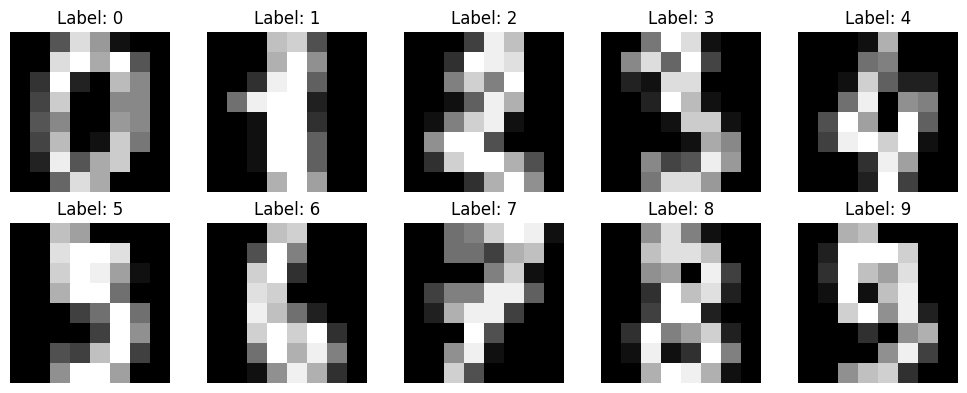

In [23]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')  # show grayscale image
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Step 3: Flatten and Normalize the Data
Each 8x8 image is flattened into a 64-length vector.
We also normalize pixel values (from range 0–16 to 0–1) to help model learning.
### Flatten the images: from 8x8 → 64 features per image

In [24]:
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
X = X / 16.0

## Step 4: Split the Data
We use 80% of the data for training and 20% for testing.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Step 5: Train Logistic Regression Model
We train the model using the training dataset.

In [26]:
model = LogisticRegression(max_iter=10000)  # allow many steps so it can learn properly
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Step 6: Make Predictions
Now we ask the model to predict labels for the test dataset.

In [28]:
y_pred = model.predict(X_test)

## Step 7: Evaluate the Model
We use a classification report and a confusion matrix to see how well the model performs.

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 43  1  0  0  2]
 [